# Math 76 HW2, Fall 2024

**Name:**

For all plots, make sure to include a title, x-axis label, and y-axis label.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma as gamma_func

from hw2_helper_funcs import *

# Problem 3.5

## Part A

Derive the formula
\begin{align}
a_{ij} = \frac{d}{n} \left( d^2 + ((i-j)/n)^2 \right)^{-3/2}, \quad i,j = 1, \ldots, n
\end{align}
for the matrix elements.

**Response:** *(it may be easier to do this on paper and submit it alongside the notebook)*

## Part B

Compute $ b = A x $ for two different exact solutions $x$: (1) a smooth solution (not a constant or linear vector) and (2) a vector with one or more jump discontinuities. Plot both vectors and label them.

In [11]:
# Parameters
n = 32
d = 0.3

# Build A matrix
A = build_gravity_matrix(n,d)

# Smooth x_true (note from chaelie: this is basically F)
x_smooth = np.cos(np.linspace(0,1,A.shape[1]))# your vector here

# Piecewise constant x_true
x_piecewise_constant = np.zeros(A.shape[1])# your vector here
x_piecewise_constant[:20] = 1

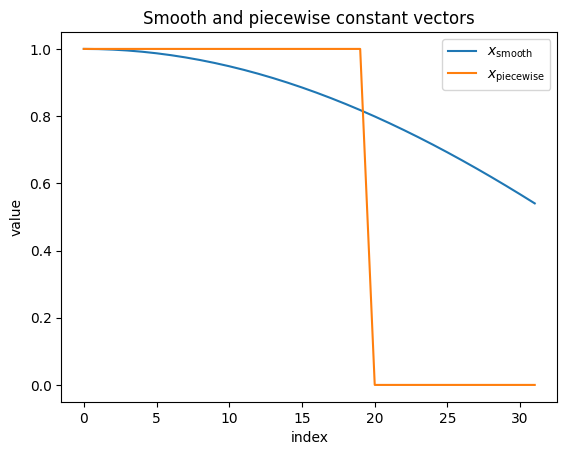

In [12]:
plt.plot(x_smooth, label="$x_{\\text{smooth}}$")
plt.plot(x_piecewise_constant, label="$x_{\\text{piecewise}}$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Smooth and piecewise constant vectors")
plt.legend()
plt.show()

In [13]:
# Compute rhs vectors
b_smooth = A @ x_smooth
b_piecewise_constant = A @ x_piecewise_constant

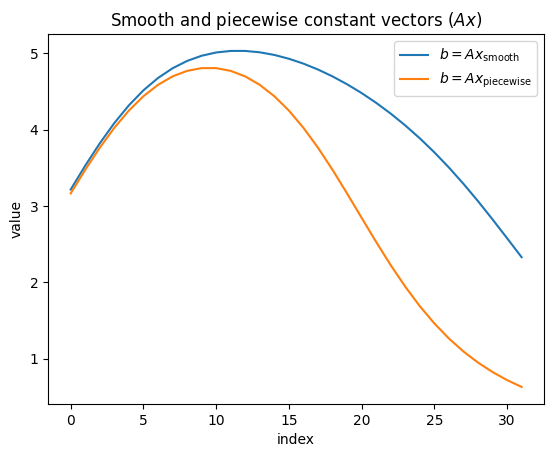

In [14]:
plt.plot(b_smooth, label="$b = A x_{\\text{smooth}}$")
plt.plot(b_piecewise_constant, label="$b = A x_{\\text{piecewise}}$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Smooth and piecewise constant vectors ($A x$)")
plt.legend()
plt.show()

Note from me: since both are continuous, problem = cant identify discrete from continuous

# Part C

Study how the RHS vectors change with the depth parameter $d$. *Suggestion: plot the rhs vectors $b$ for varying parameter $d$ on the same plot. Make sure to label each curve with the value of $d$ that was used.*

### For smooth $x_{\text{true}}$

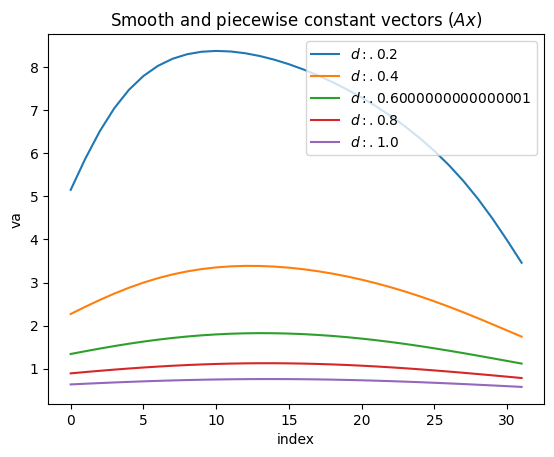

In [19]:
######################
### Your code here ###
######################

ds = np.arange(0.2,1.1,0.2)


for d in ds:
    A = build_gravity_matrix(n,d)

    b_smooth = A @ x_smooth

    plt.plot(b_smooth, label=f"$d :. {d}$")


plt.xlabel("index")
plt.ylabel("value")
plt.title("Bsmooth for varying depth")
plt.legend()
plt.show()

### For piecewise constant $x_{\text{true}}$

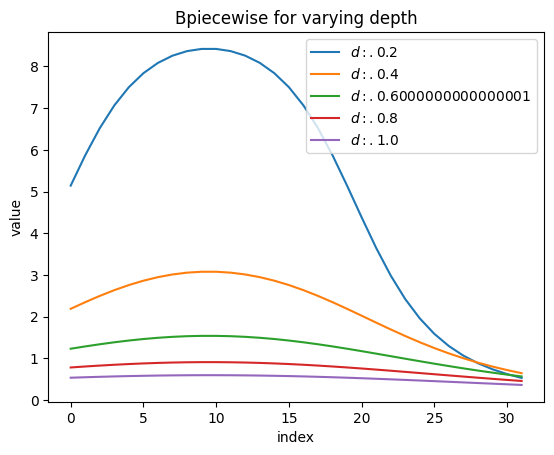

In [20]:
######################
### Your code here ###
######################

ds = np.arange(0.2,1.1,0.2)


for d in ds:
    A = build_gravity_matrix(n,d)

    b_smooth = A @ x_piecewise_constant

    plt.plot(b_smooth, label=f"$d :. {d}$")


plt.xlabel("index")
plt.ylabel("value")
plt.title("Bpiecewise for varying depth")
plt.legend()
plt.show()

## Part D

Study how the condition number of $A$ varies for varying $d$ and fixed $n$; then, study how the condition number of $A$ varies for varying $n$ but fixed $d$.

Condition (a) = Largest singular value / smallest singular value. (from me)

### Varying $d$, fixed $n$

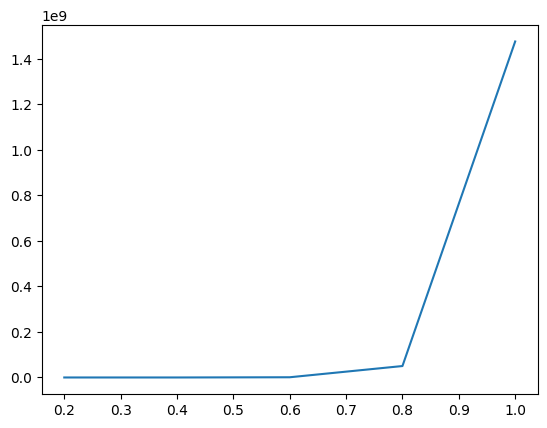

In [23]:
######################
### Your code here ###
######################

n = 10
ds = np.arange(0.2,1.1,0.2)
conds = []
for d in ds:
    A = build_gravity_matrix(n,d)
    kappa = np.linalg.cond(A)
    conds.append(kappa)

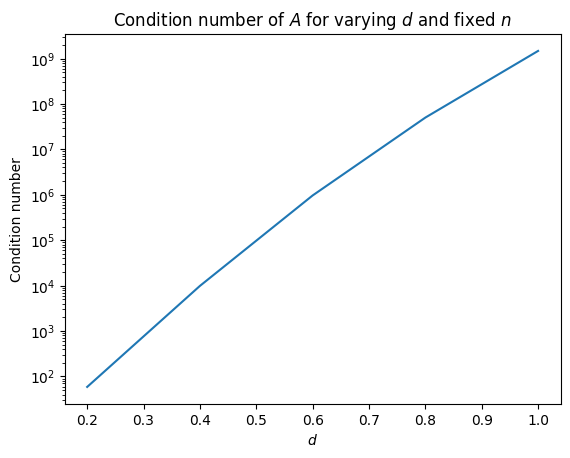

In [25]:
plt.semilogy(ds, conds)
plt.xlabel("$d$")
plt.ylabel("Condition number")
# or plt y_scale = log
plt.title("Condition number of $A$ for varying $d$ and fixed $n$")
plt.show()

**Explanation of observed behavior:** (basically as depth grows, gets harder to solve)

### Varying $n$, fixed $d$

In [35]:
######################
### Your code here ###
######################

######################
### Your code here ###
######################

ns = np.arange(5,25)
d = 0.5
conds = []
for n in ns:
    A = build_gravity_matrix(n,d)
    kappa = np.linalg.cond(A)
    conds.append(kappa)

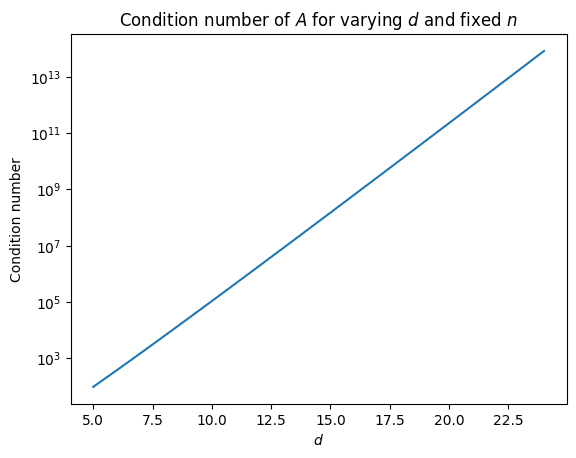

In [37]:
plt.semilogy(ns, conds)
plt.xlabel("$d$")
plt.ylabel("Condition number")
# or plt y_scale = log
plt.title("Condition number of $A$ for varying $d$ and fixed $n$")
plt.show()

**Explanation of observed behavior:**

## Part E

Solve the problem $A x = b$ using a noise-free rhs $b$. Then, try again but instead solve $A x = b + \delta$ where $\delta$ is a white noise Gaussian vector $\delta \sim \mathcal{N}(\mathbf{0}, \sigma^2 \mathbf{I})$.

In [42]:
# Build matrix
n = 32
d = 0.5
A = build_gravity_matrix(n,d)

# Get exact b's
b_smooth = A @ x_smooth
b_piecewise_constant = A @ x_piecewise_constant


Solve $A x = b$ (for both smooth and piecewise constant vectors), and plot

Text(0, 0.5, 'value')

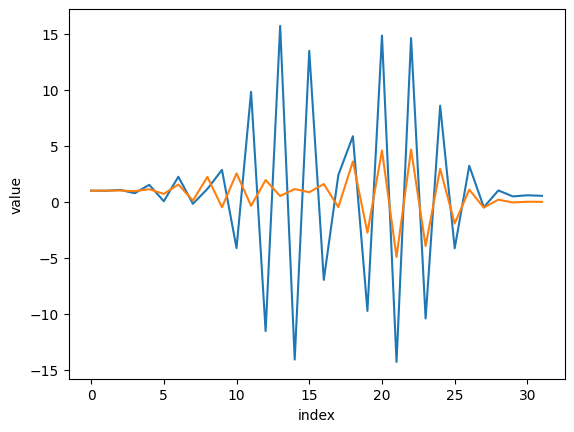

In [46]:
######################
### Your code here ###
######################

x_smooth_est = np.linalg.solve(A, b_smooth)
x_piecewise_est = np.linalg.solve(A, b_piecewise_constant)

plt.plot(x_smooth_est, label = "xsmooth_est")
plt.plot(x_piecewise_est, label = "xpiecewise_est")
plt.xlabel("index")
plt.ylabel("value")

Text(0, 0.5, 'value')

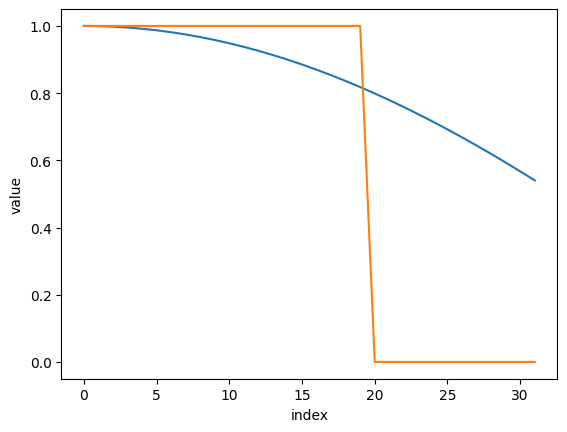

In [48]:
plt.plot(x_smooth, label = "xsmooth_est")
plt.plot(x_piecewise_constant, label = "xpiecewise_est")
plt.xlabel("index")
plt.ylabel("value")

Solve $A x = b + \delta$ (for both smooth and piecewise constant vectors), and plot

Text(0, 0.5, 'value')

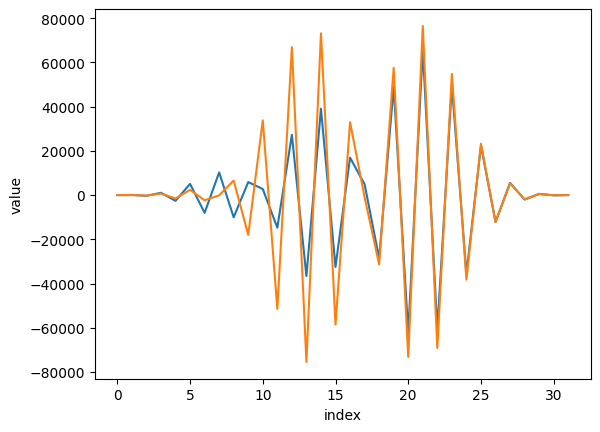

In [59]:
######################
### Your code here ###
######################


x_smooth_est = np.linalg.solve(A, b_smooth + 1e-12 *np.random.normal(size=len(b_smooth)))
x_piecewise_est = np.linalg.solve(A, b_piecewise_constant + 1e-12 *np.random.normal(size=len(b_piecewise_constant)))

plt.plot(x_smooth_est, label = "xsmooth_est")
plt.plot(x_piecewise_est, label = "xpiecewise_est")
plt.xlabel("index")
plt.ylabel("value")

Text(0, 0.5, 'value')

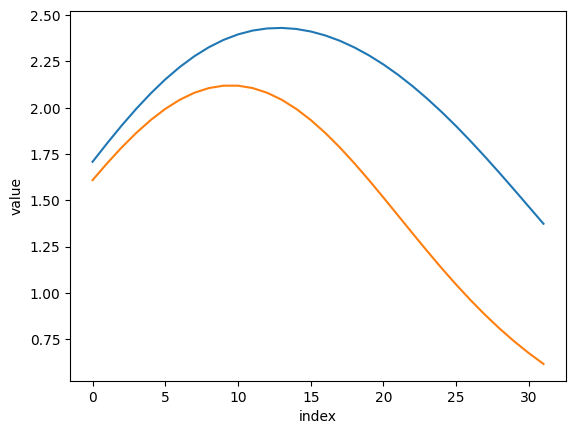

In [61]:
plt.plot(A @ x_smooth_est, label = "xsmooth_est")
plt.plot(A @ x_piecewise_est, label = "xpiecewise_est")
plt.xlabel("index")
plt.ylabel("value")

How large can $||\delta||_2$ get before the inverted noise starts to dominate? Design a computational study/visualization below to support your claim.

**Response:**

In [ ]:
######################
### Your code here ###
######################

compute norm of noise -vs norm of error: (norm of x_smooth_est = np.linalg.solve(A, b_smooth + 1e-12 *np.random.normal(size=len(b_smooth))) vs error)

# Problem 3.6

## Part A

Generate the problem.

In [62]:
n = 24
A, b_exact, x_exact = shaw(n)

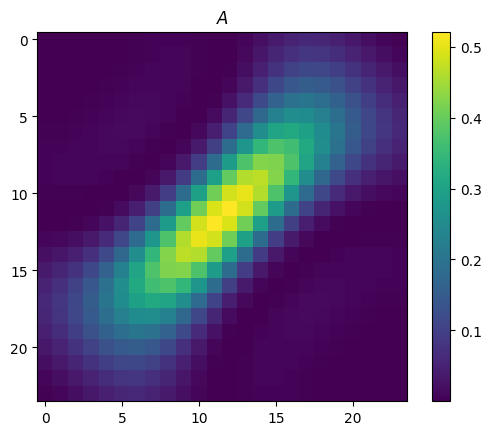

In [63]:
plt.imshow(A)
plt.title("$A$")
plt.colorbar()
plt.show()

Get the SVD (use `np.linalg.svd`).

In [80]:
svdres = np.linalg.svd(A)
U = svdres.U
S = svdres.S
Vt = svdres.Vh

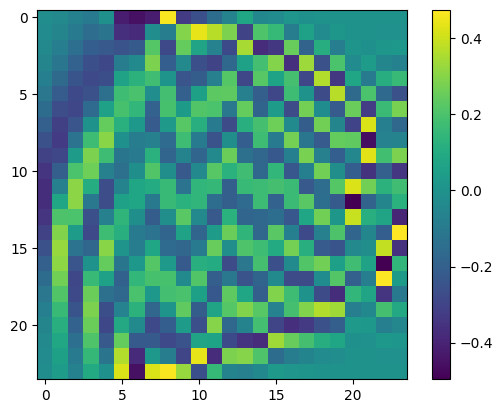

In [81]:
plt.imshow(U)
plt.colorbar()
plt.show()

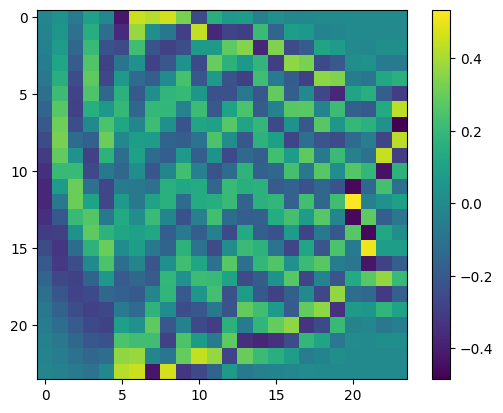

In [82]:
plt.imshow(Vt.T)
plt.colorbar()
plt.show()

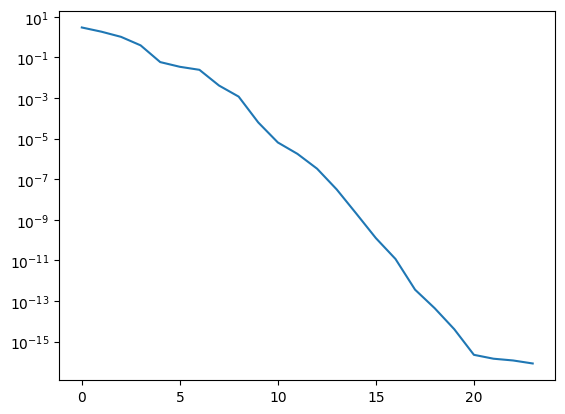

In [83]:
######################
### Your code here ###
######################

np.linalg.svd(A)
plt.semilogy(np.linalg.svd(A).S)
plt.show()

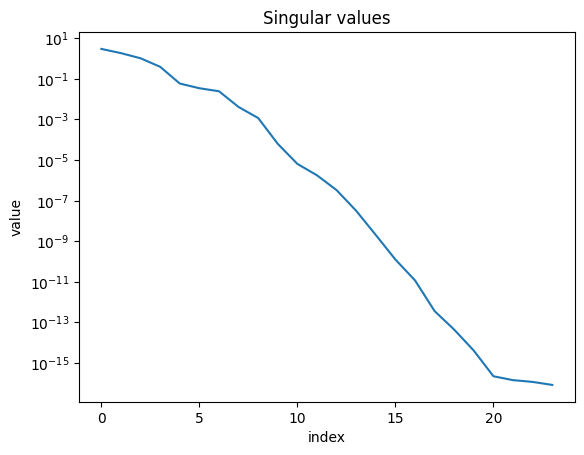

In [85]:
plt.semilogy(S)
plt.title("Singular values")
plt.xlabel("index")
plt.ylabel("value")
plt.show()

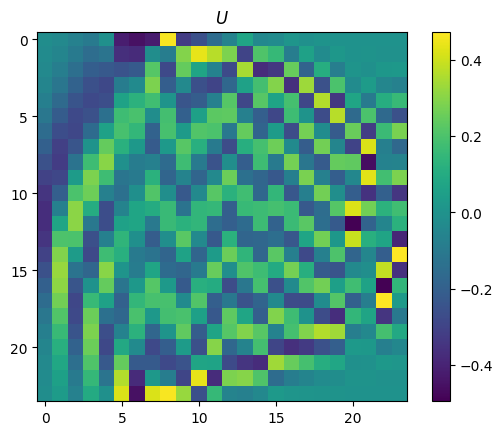

In [87]:
plt.imshow(U)
plt.title("$U$")
plt.colorbar()
plt.show()

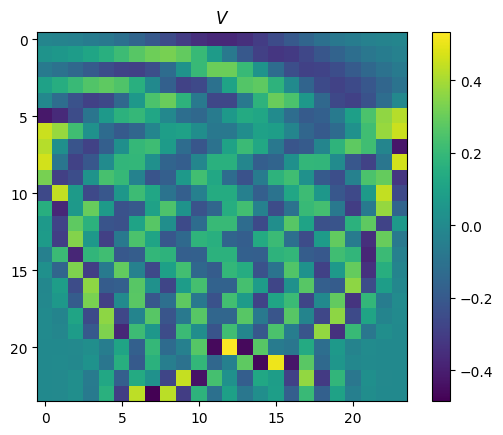

In [89]:
plt.imshow(Vt)
plt.title("$V$")
plt.colorbar()
plt.show()

What can be said about the number of sign changes in the left and right singular vectors? Try computing the number of sign changes in each vector and plotting them as a function of $i$. For convenience, you can use the function `count_sign_switches` in `hw2_helper_funcs.py`.

**Response:**

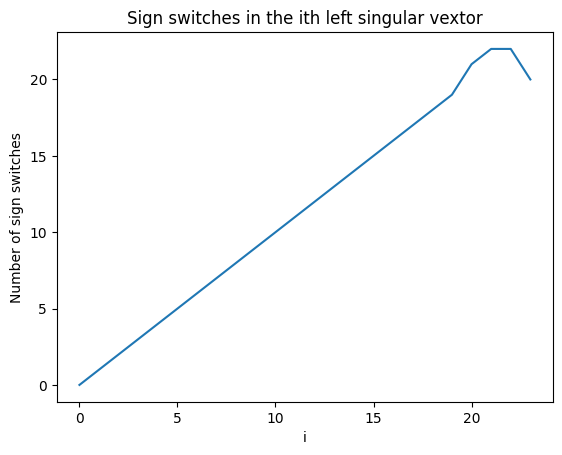

In [91]:
######################
### Your code here ###
######################

switches = []
for i in range(n):

  switches.append(count_sign_switches(U[:,i]))

plt.plot(switches)
plt.title("Sign switches in the ith left singular vextor")
plt.xlabel("i")
plt.ylabel("Number of sign switches")
plt.show()

# basically as increase i, looking at smaller singular values

## Part B

Use the function `picard` from `hw2_helper_funcs.py` to inspect the singular values and SVD coefficients. Is the Picard condition satisfied? Why or why not?

**Response:**

On average, yes because the oranges are below the blue

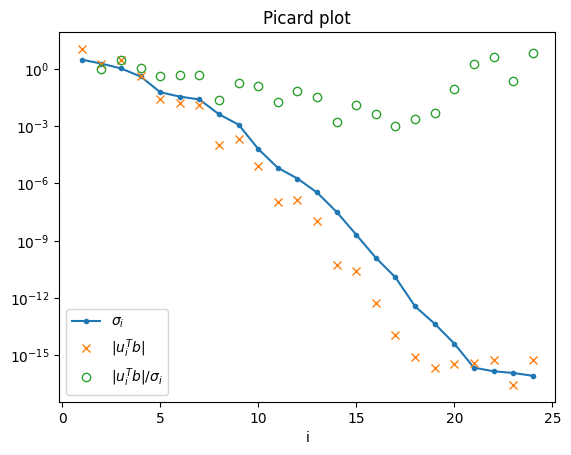

In [92]:
eta = picard(U, s, b_exact)

## Part C

Add a small amount of noise to $b_{\text{exact}}$, i.e., $b = b_{\text{exact}} + e$ with $\| e \|_2/\| b_{\text{exact}} \|_2 = 10^{-10}$. Inpsect the new Picard plot. What happens to the SVD coefficients $u_i^T b$ corresponding to small singular values?

**Response:**

In [102]:
######################
### Your code here ###
######################

e = np.random.normal(size=len(b_exact))
e = (e/np.linalg.norm(e))*np.linalg.norm(b_exact)*1e-10
b_noisy = b_exact + e

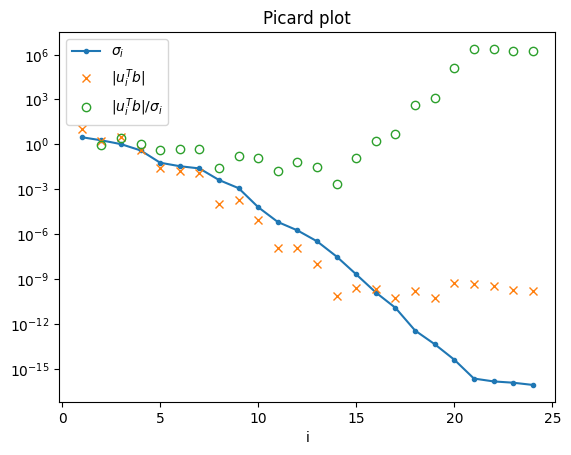

In [103]:
eta = picard(U, s, b_noisy)

# Part D

Compute the partial sums
$$
x_k = \sum_{i=1}^k \frac{u_i^T b}{\sigma_i} v_i, \quad k = 1, \ldots
$$
and inspect the vectors $x_k$ (plot them). Try to explain the behavior of these vectors.

**Response:**

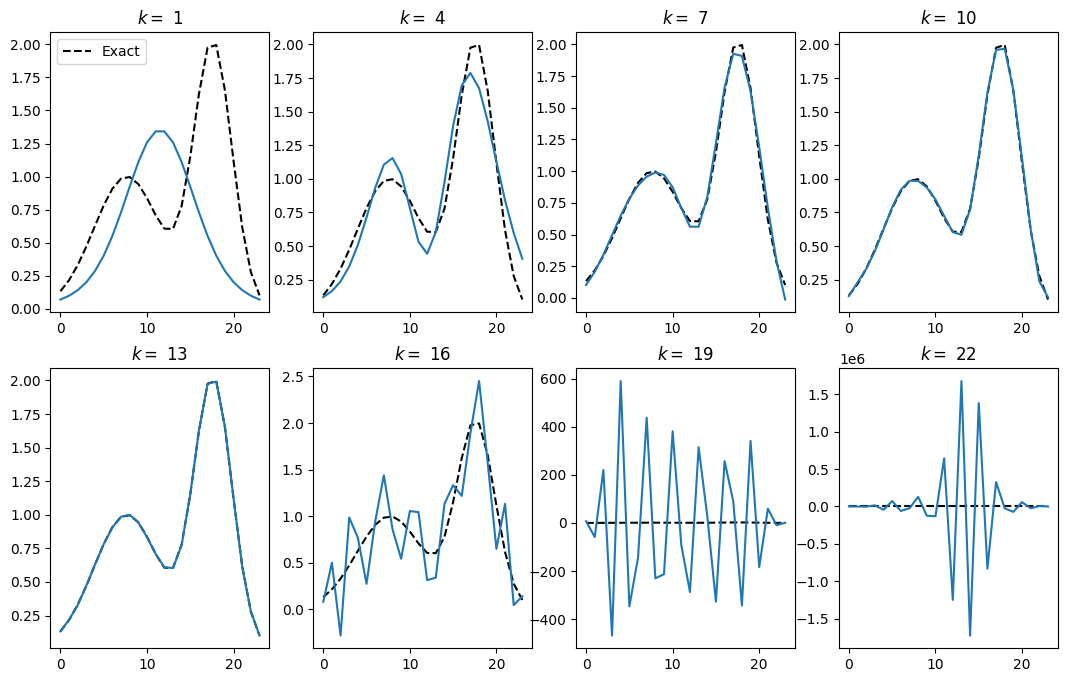

In [105]:
ks = np.arange(1,25,3)
fig, axs = plt.subplots(2,4, figsize=(13,8))

# Iterate over each axis
for j, ax in enumerate(axs.flat):

    # Plot exact solution
    ax.plot(x_exact, label="Exact", color="k", ls="--")
    if j == 0:
        ax.legend()

    # Title
    ax.set_title(f"$k = $ {ks[j]}")

    # Compute xk

    ######################
    ### Your code here ###
    ######################

    k = ks[j]
    xk = np.zeros_like(x_exact)
    for i in range(k):
      xk += np.dot(U[:,i], b_noisy) / S[i] * Vt[i,:]

    # Plot xk
    ax.plot(xk)

# Problem 3.7

## Part A

Choose $m = 40$ and $\eta = 10^{-5}$ and generate a number of instances of white Gaussian noise with standard deviation $\eta$, by means of `e = eta*np.random.normal(size=m)`. Check that the computed values of $\mathcal{E}(e)$, $\mathcal{E}(\| e \|_2^2)$, and $\mathcal{E}(\| e \|_2)$ are in accordance with the results in (3.20). Are they?

**Response:**

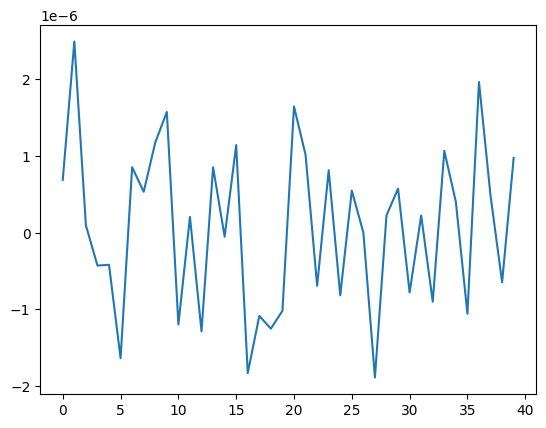

In [114]:
# Parameters
m = 40
eta = 1e-5


n_instances = 100
randvecs = eta*np.random.normal(size=(n_instances,m))

mean_e = np.mean(randvecs, axis = 0)

plt.plot(mean_e)
plt.show()

In [ ]:
######################
### Your code here ###
######################

In [ ]:
print(f"Mean of || e ||_2: {mean_e_norm:5e}")
print(f"Mean of || e ||_2^2: {mean_e_norm_sq:5e}")

In [ ]:
print(f"Theoretical mean of || e ||_2: {theoretical_mean_e_norm:5e}")
print(f"Theoretical mean of || e ||_2^2: {theoretical_mean_e_norm_sq:5e}")

## Part B

Set up the same `shaw` problem from the previous problem, with exact rhs vector $b_{\text{exact}}$. Add a noise vector $e$ from part A to get a noisy rhs vector $b_{\text{noisy}}$. What is the relative noise level $\| e \|_2 / \| b_{\text{exact}} \|_2$

**Response:**

In [ ]:
# Setup shaw problem
A, b_exact, x_exact = shaw(m)

# Get SVD

######################
### Your code here ###
######################

In [ ]:
print(f"Noise level: {noise_level:3e}")

## Part C

Use a semilogarithmic plot to show absolute values of the elements of $U^T b_{\text{exact}}$ and $U^T e$, and explain the behavior of these plots. In particular, explain why both graphs tend to level off in the right part of the plot, and explain the magnitude of the plateau.

**Response:**

In [ ]:
#######################
### Your code here ###
######################

## Part D

Show that if you want to generate a noisy rhs with a given noise level $\| e \|_2 / \| b_{\text{exact}} \|_2$ = `rnl`, you should use the Python code:
```python
e = np.random.normal(m)
e = e/np.linalg.norm(e)
e = rnl*np.linalg.norm(b_exact)*e
b = b_exact + e
```

**Response:**